# Analytical simulations of boundary profiles

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Define functions


def x_plot(t, x_p, k1, k2, t1, t2):
    # see Equation S7
    return (x_p**2 + (k1**2)*(t-t1)**2 - (k2**2)*(t-t2)**2) / (2*x_p)

def y_plot(t, x_p, k1, k2, t1, t2):
    # see Equation S7
    return np.sqrt(k1**2 * (t - t1)**2 - x_plot(t, x_p, k1, k2, t1, t2)**2)

def lin_eq(x, m, b):
    # simple linear equation
    return m*x + b


## Delayed growth

In [3]:
# Initialize variables

x_p = 9 #mm
k1  = 0.0506 #mm/min
k2  = 0.0506 #mm/min
t1  = 0 #min
t2  = 0 #min

td = 14.6 #min (doubling time)


Text(0.5, 1.0, 'Simulated Boundary: Delayed Expansion')

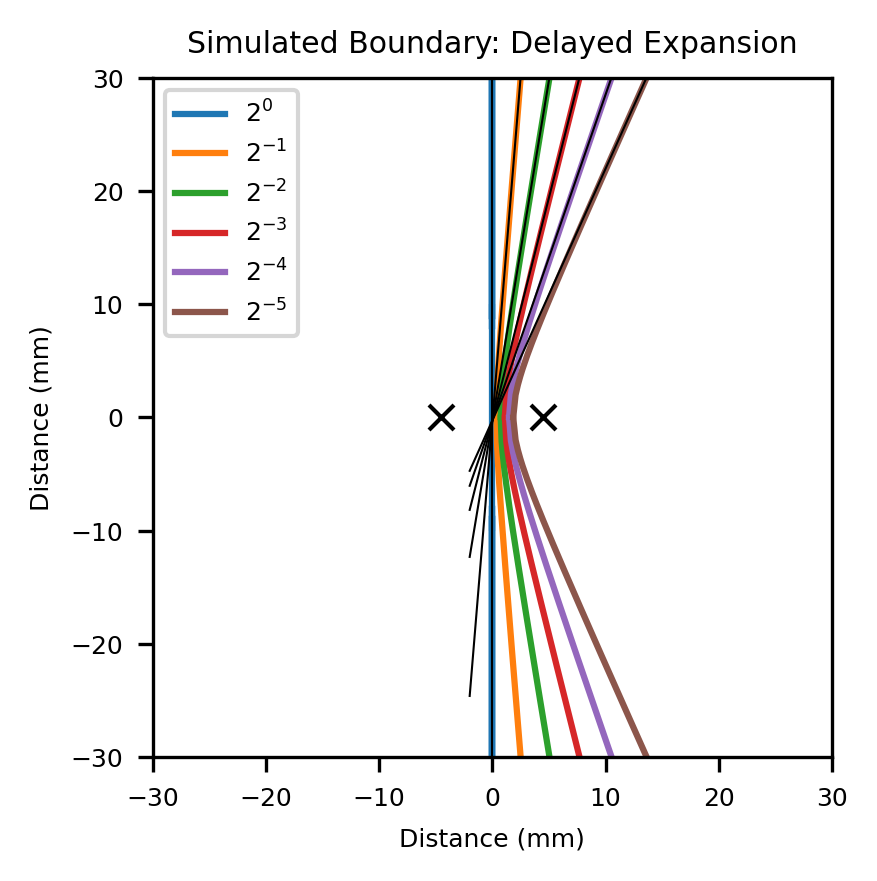

In [4]:
# Delayed growth with matched migration speeds

plt.rcParams.update({'font.size': 6})
plt.tight_layout = {'pad': 0} 
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
ax.set_aspect('equal', adjustable='box')

popt_list = []

for i in range(6):
    # update delay time for strain #2
    t2 = td*i
    
    # create discretized timesteps
    t_space = np.linspace((x_p + k2*t2)/(k1+k2)+0.001, 10000, num=1000)
    
    # plot simulated boundary profile
    sns.lineplot(x_plot(t_space, x_p, k1, k2, t1, t2)-x_p/2,
                 y_plot(t_space, x_p, k1, k2, t1, t2),
                 color=sns.color_palette()[i],
                 label='2$^{' + str(-1*i) + '}$')

    # plot negative
    sns.lineplot(x_plot(t_space, x_p, k1, k2, t1, t2)-x_p/2,
                 -y_plot(t_space, x_p, k1, k2, t1, t2),
                 color=sns.color_palette()[i])

    # for visual clarity, close gap for the near vertical case
    if i==0:
        plt.vlines(0, -10, 10, linewidths=1.5)
        
    # best-fit line
    popt, pcov = curve_fit(lin_eq, x_plot(t_space, x_p, k1, k2, t1, t2), y_plot(t_space, x_p, k1, k2, t1, t2))
    popt_list.append(popt)
    
    if i==0:
        plt.vlines(0, -30, 30, 'k', linewidths=0.5, zorder=100) # line fit fails for near vertical
    else:
        plt.plot(np.linspace(2.5,20)-x_p/2, lin_eq(np.linspace(2.5,20), *popt), 'k-', linewidth='0.5')

plt.legend(loc='upper left')
plt.plot([-x_p/2,x_p/2],[0,0],'kx')
plt.xlim([-30,30])
plt.ylim([-30,30])
plt.xlabel('Distance (mm)')
plt.ylabel('Distance (mm)')
plt.title('Simulated Boundary: Delayed Expansion')


Text(0.5, 1.0, 'Boundary angle as a function of delay')

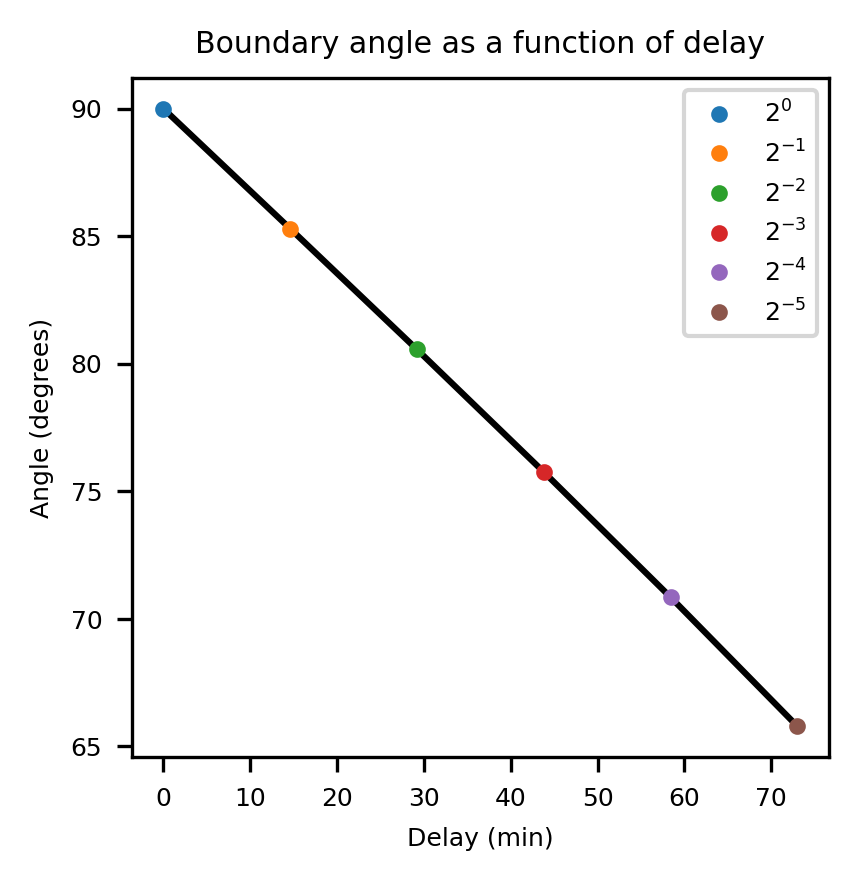

In [5]:
# Plot slope as function of delayed growth

plt.rcParams.update({'font.size': 6})
plt.tight_layout = {'pad': 0} 
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)

slopes = [90] #hard code near vertical case

# convert radians to degrees
for i in popt_list[1:]:
    slopes.append(np.arctan(i[0]) * 180 / np.pi)

# plot line
plt.plot(td*np.array([0,1,2,3,4,5]),slopes,'k')

# plot datapoints
for i in range(6):
    plt.plot([td*i],slopes[i],'.',
             color=sns.color_palette()[i],
             label='2$^{' + str(-1*i) + '}$')

plt.legend(loc='upper right')
plt.ylabel('Angle (degrees)')
plt.xlabel('Delay (min)')
plt.title('Boundary angle as a function of delay')


## Differential expansion rate

In [6]:
# Initialize variables

x_p = 9 #mm
k1  = 0.0506 #mm/min
k2  = 0 #mm/min
t1  = 0 #min
t2  = 0 #min


Text(0.5, 1.0, 'Simulated Boundary: Differential Expansion')

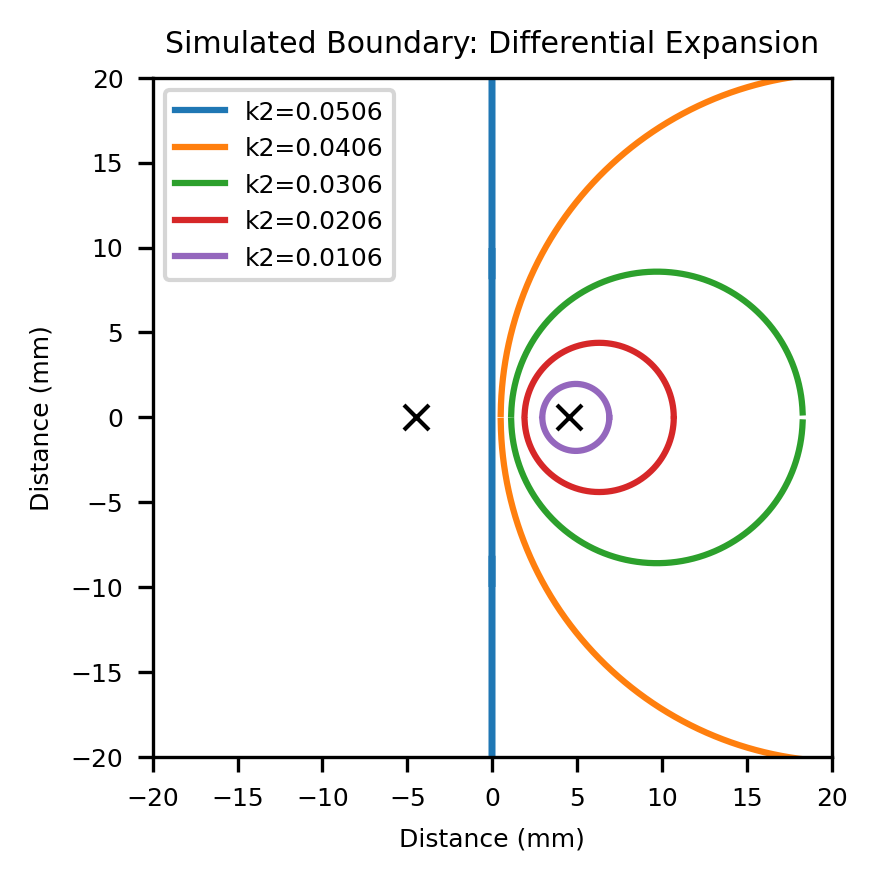

In [7]:
# Differential expansion speed, with circular boundaries

plt.rcParams.update({'font.size': 6})
plt.tight_layout = {'pad': 0} 
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
ax.set_aspect('equal', adjustable='box')

# container to store radii of boundaries
radii_list = []
k2_list = []

for i in range(5):
    # update expansion speed
    k2 = k1 - 0.01*i
    k2_list.append(k2)
    
    # discretize time
    t_space = np.linspace((x_p + k2*t2)/(k1+k2)+0.1, 10000 , num=100000)
    
    # plot simulated boundary profiles
    x_vals = x_plot(t_space, x_p, k1, k2, t1, t2)-x_p/2
    y_vals = y_plot(t_space, x_p, k1, k2, t1, t2)
    sns.lineplot(x_vals,
                 y_vals,
                 color=sns.color_palette()[i],
                 label='k2={:.4f}'.format(k2))
    sns.lineplot(x_vals,
                 -y_vals,
                 color=sns.color_palette()[i])
    
    # close gap for near vertical case
    plt.vlines(0, -10, 10)
    
    # store max values as radii
    radii_list.append(np.max(y_vals[~np.isnan(y_vals)]))
    
plt.plot([-x_p/2,x_p/2], [0,0], 'kx')
plt.xlim([-20, 20])
plt.ylim([-20, 20])
plt.legend(loc='upper left')
plt.xlabel('Distance (mm)')
plt.ylabel('Distance (mm)')
plt.title('Simulated Boundary: Differential Expansion')


Text(0.5, 1.0, 'Radius of enclosed colony as a function of \n differential growth rates')

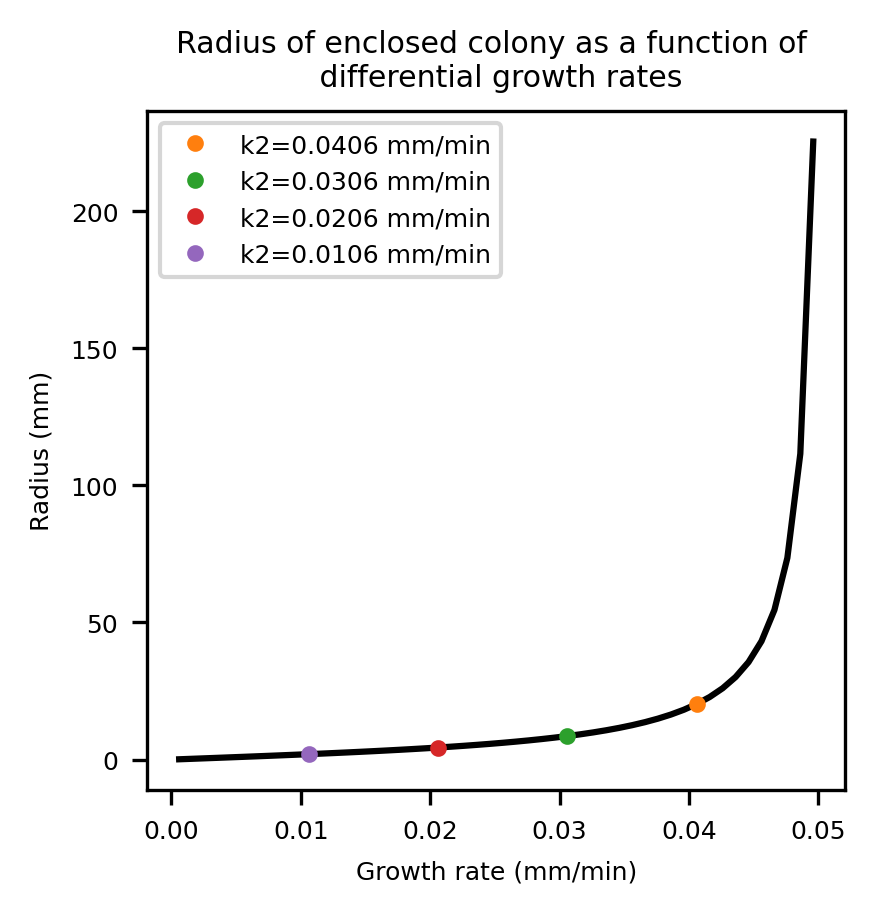

In [8]:
# Plot radii as a function of k2

plt.rcParams.update({'font.size': 6})
plt.tight_layout = {'pad': 0} 
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)

# Plot continuous curve of radius as a function of k2
radii_smooth = []
k2_smooth = []

for i in range(50):
    k2 = k1 - 0.001*(i+1)
    t_space = np.linspace((x_p + k2*t2)/(k1+k2)+0.1, 10000 , num=100000)
    vals = y_plot(t_space, x_p, k1, k2, t1, t2)
    radii_smooth.append(np.max(vals[~np.isnan(vals)]))
    k2_smooth.append(k2)

plt.plot(k2_smooth, radii_smooth, 'k-')

# Plot points from simulation
for i in range(4):
    plt.plot(k2_list[i+1], radii_list[i+1], '.', color=sns.color_palette()[i+1],
             label='k2={:.4f}'.format(k2_list[i+1]) + ' mm/min')

plt.legend(loc='upper left')
plt.xlabel('Growth rate (mm/min)')
plt.ylabel('Radius (mm)')
plt.title('Radius of enclosed colony as a function of \n differential growth rates')
